## Telecom Churn Case Study (With different models)

### Problem Statement

#### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. So, to reduce customer churn rate, this telecom company needs to know below two aspects:
#### - Which high profitable customers are at high risk of churn?  
#### - Which features are the main indicators of churn?

### Importing Data

In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
churn_data = pd.read_csv("telecom_churn_data.csv")
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# check shape of dataset
churn_data.shape

(99999, 226)

### Let's understand the structure of our dataframe

In [4]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
# check info of dataset
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Preparation

In [6]:
# Rename last four columns to match with rest of the column names based on month number appended
churn_data = churn_data.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'})
churn_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9'], dtype='object', length=226)

In [7]:
# Get  columns whose data type is object i.e. string
objectColumns = churn_data.dtypes[churn_data.dtypes == np.object]
 
# list of columns whose data type is object i.e. string
listOfColumnNames = list(objectColumns.index)
 
print(listOfColumnNames)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [8]:
# Convert all date columns into Date datatype from object type
churn_data[listOfColumnNames] = pd.to_datetime(churn_data[listOfColumnNames].stack()).unstack()
churn_data[listOfColumnNames].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


In [9]:
# Now check the info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to vbc_3g_9
dtypes: datetime64[ns](12), float64(179), int64(35)
memory usage: 172.4 MB


Now there are no string data type columns at all.

In [10]:
# Get days from last recgarge date columns
churn_data['days_of_last_rech_6'] = (churn_data['last_date_of_month_6'] - churn_data['date_of_last_rech_6']).dt.days
churn_data['days_of_last_rech_7'] = (churn_data['last_date_of_month_7'] - churn_data['date_of_last_rech_7']).dt.days
churn_data['days_of_last_rech_8'] = (churn_data['last_date_of_month_8'] - churn_data['date_of_last_rech_8']).dt.days
churn_data['days_of_last_rech_9'] = (churn_data['last_date_of_month_9'] - churn_data['date_of_last_rech_9']).dt.days

churn_data['days_of_last_rech_data_6'] = (churn_data['last_date_of_month_6'] - churn_data['date_of_last_rech_data_6']).dt.days
churn_data['days_of_last_rech_data_7'] = (churn_data['last_date_of_month_7'] - churn_data['date_of_last_rech_data_7']).dt.days
churn_data['days_of_last_rech_data_8'] = (churn_data['last_date_of_month_8'] - churn_data['date_of_last_rech_data_8']).dt.days
churn_data['days_of_last_rech_data_9'] = (churn_data['last_date_of_month_9'] - churn_data['date_of_last_rech_data_9']).dt.days

churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,days_of_last_rech_6,days_of_last_rech_7,days_of_last_rech_8,days_of_last_rech_9,days_of_last_rech_data_6,days_of_last_rech_data_7,days_of_last_rech_data_8,days_of_last_rech_data_9
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,2014-09-30,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,N

In [11]:
# Get columns with unique values
nunique = churn_data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], dtype='object')

In [12]:
# Drop columns with unique values as they don't add any value for model
churn_data = churn_data.drop(cols_to_drop, axis=1)
churn_data.shape

(99999, 218)

In [13]:
# Drop the mobile number column along with date columns where days columns were created for them
churn_data = churn_data.drop(['mobile_number', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 
                              'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 
                              'date_of_last_rech_data_9'], axis=1)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 209 entries, arpu_6 to days_of_last_rech_data_9
dtypes: float64(176), int64(33)
memory usage: 159.5 MB


Now there are only continuous variables, no string or date variables.

### Checking for Outliers

In [14]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
churn_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [15]:
# Remove outliers in identified columns from dataset
for col in churn_data.columns:
    percentiles = churn_data[col].quantile([0.01,0.99]).values
    churn_data[col] = np.clip(churn_data[col], percentiles[0], percentiles[1])

In [16]:
# Check for outliers again
churn_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

In [17]:
churn_data.shape

(99999, 209)

### Checking for Missing Values and Inputing Them

In [18]:
# Checking the percentage of missing values
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou_6             3.94
loc_og_t2t_mou_7             3.86
loc_og_t2t_mou_8             5.38
loc_og_t2t_mou_9             7.75
loc_og_t2m_mou_6             3.94
loc_og_t2m_mou_7             3.86
loc_og_t2m_mou_8             5.38
loc_og_t2m_mou_9             7.75
loc_og_t2f_mou_6             3.94
loc_og_t2f_mou

In [19]:
# Drop the columns where missing data percentage is more than 70%
churn_data = churn_data.dropna(thresh=churn_data.shape[0]*(1-0.7),how='all',axis=1)
churn_data.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7',
       ...
       'sachet_3g_9', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9', 'days_of_last_rech_6', 'days_of_last_rech_7', 'days_of_last_rech_8', 'days_of_last_rech_9'], dtype='object', length=169)

In [20]:
# Checking percentage of missing values after removing the missing values
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
arpu_9                 0.00
onnet_mou_6            3.94
onnet_mou_7            3.86
onnet_mou_8            5.38
onnet_mou_9            7.75
offnet_mou_6           3.94
offnet_mou_7           3.86
offnet_mou_8           5.38
offnet_mou_9           7.75
roam_ic_mou_6          3.94
roam_ic_mou_7          3.86
roam_ic_mou_8          5.38
roam_ic_mou_9          7.75
roam_og_mou_6          3.94
roam_og_mou_7          3.86
roam_og_mou_8          5.38
roam_og_mou_9          7.75
loc_og_t2t_mou_6       3.94
loc_og_t2t_mou_7       3.86
loc_og_t2t_mou_8       5.38
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_6       3.94
loc_og_t2m_mou_7       3.86
loc_og_t2m_mou_8       5.38
loc_og_t2m_mou_9       7.75
loc_og_t2f_mou_6       3.94
loc_og_t2f_mou_7       3.86
loc_og_t2f_mou_8       5.38
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_6       3.94
loc_og_t2c_mou_7       3.86
loc_og_t2c_mou_8       5.38
loc_og_t2c_mou_9    

In [21]:
# Imputing missing values in repective columns
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

churn_data = DataFrameImputer().fit_transform(churn_data)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 169 entries, arpu_6 to days_of_last_rech_9
dtypes: float64(138), int64(31)
memory usage: 128.9 MB


In [22]:
# Checking percentage of missing values after removing the missing values
round(100*(churn_data.isnull().sum()/len(churn_data.index)), 2)

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
arpu_9                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
onnet_mou_9            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
offnet_mou_9           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_ic_mou_9          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
roam_og_mou_9          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2t_mou_9       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2m_mou_9       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2f_mou_9       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_t2c_mou_9       0.0
loc_og_mou_6           0.0
l

Now we don't have any missing values

### Filter high-value customers
#### As mentioned above, you need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [23]:
# Create new column to have average recharge amount from first two months 6 and 7
churn_data['avg_rech_amt_good_phase'] = (churn_data['total_rech_amt_6'] + churn_data['total_rech_amt_7'])/2
churn_data[['total_rech_amt_6', 'total_rech_amt_7', 'avg_rech_amt_good_phase']].head()

,total_rech_amt_6,total_rech_amt_7,avg_rech_amt_good_phase
0,362.0,252,307.0
1,74.0,384,229.0
2,168.0,315,241.5
3,230.0,310,270.0
4,196.0,350,273.0


In [24]:
# Get the 70% percentile of the average recharge amount of good phase column
churn_data.avg_rech_amt_good_phase.quantile(0.7)

368.5

In [25]:
# Filter high valued customers with greater than or equal to above value
churn_data = churn_data[churn_data['avg_rech_amt_good_phase'] >= churn_data.avg_rech_amt_good_phase.quantile(0.7)]
churn_data.shape

(30011, 170)

### Tag churners and remove attributes of the churn phase

#### Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

#### - total_ic_mou_9

#### - total_og_mou_9

#### - vol_2g_mb_9

#### - vol_3g_mb_9


#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [26]:
churn_data['Churn'] = np.where(((churn_data['total_ic_mou_9'] == 0) & (churn_data['total_og_mou_9'] == 0 ) & (churn_data['vol_2g_mb_9'] == 0) & (churn_data['vol_3g_mb_9'] == 0) ), 1, 0)
churn_data[['avg_rech_amt_good_phase', 'Churn']].head(10)

,avg_rech_amt_good_phase,Churn
7,1185.0,1
8,519.0,0
13,380.0,0
16,459.0,0
17,408.0,0
21,640.0,0
24,385.0,0
33,1393.0,0
38,528.0,0
41,503.0,0


In [27]:
# Get columns ends with "_9"
churn_data.filter(regex='_9$',axis=1).columns.to_list()

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'vbc_3g_9',
 'days_of_last_rech_9']

In [28]:
# Remove churn phase attributes
churn_data = churn_data.drop(churn_data.filter(regex='_9$',axis=1).columns.to_list(), axis=1)
churn_data.shape

(30011, 129)

In [29]:
churn_data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_of_last_rech_6,days_of_last_rech_7,days_of_last_rech_8,avg_rech_amt_good_phase,Churn
7,1069.180,1349.850,1455.53996,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,54.9178,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,7.03,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.4400,126.99,141.330,41.5595,34.24,22.21,180.5400,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.0600,14.53,31.59,14.6339,15.19,15.140,5,5,7,1580.0,790,1721,550,550,550,0,0,455,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,3.0,6.0,5.0,1185.0,1
8,378.721,492.223,137.36200,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.0000,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.4300,4.08,0.650,0.0000,0.00,0.00,22.4300,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.0000,0.00,0.00,0.0000,0.00,0.000,19,21,14,437.0,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,5.0,0.0,1.0,519.0,0
13,492.846,205.671,593.26000,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.5400,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,150.05,270.3836,29.79,280.856,0.0000,0.00,1.91,401.0534,68.09,413.15,968.61,172.58,1144.53,0.45,0.0,0.0,166.6107,62.11,178.74,14.6339,16.24,16.804,6,4,11,507.0,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,10.0,9.0,1.0,380.0,0
16,430.975,299.869,187.89400,50.51,74.01,70.61,296.29,229.74,16

### Checking the Churn Rate

In [30]:
churn = (sum(churn_data['Churn'])/len(churn_data['Churn'].index))*100
churn

8.64016527273333

We have almost 8% churn rate where is huge data imbalance.

### Handle data imbalance

In [31]:
from sklearn.utils import resample

# separate minority and majority classes
not_churn = churn_data[churn_data.Churn==0]
churn = churn_data[churn_data.Churn==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
churn_data = pd.concat([not_churn, churn_upsampled])

# check new class counts
churn_data.Churn.value_counts()

1    27418
0    27418
Name: Churn, dtype: int64

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [32]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = churn_data.drop(['Churn'],axis=1)

# Putting response variable to y
y = churn_data['Churn']

y.head()

8     0
13    0
16    0
17    0
21    0
Name: Churn, dtype: int32

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Feature Scaling

In [34]:
# Scale the all numerical features except "Churn" feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[X.columns] = scaler.fit_transform(X_train[X.columns])

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,days_of_last_rech_6,days_of_last_rech_7,days_of_last_rech_8,avg_rech_amt_good_phase
85377,-0.873381,-0.099734,-0.195563,-0.506614,-0.333826,-0.072314,-0.575487,-0.260004,-0.296631,2.237399,0.933048,3.296437,3.625950,0.360986,3.877120,-0.605377,-0.171821,-0.389474,-0.743171,-0.382449,-0.719997,-0.318784,-0.259775,-0.270753,-0.357781,-0.367109,-0.348863,-0.784556,-0.366340,-0.667465,-0.605399,-0.302986,-0.367903,-0.626422,-0.052905,-0.354926,-0.253128,0.651571,-0.246283,-0.816088,-0.255642,-0.463723,-0.239874,-0.230283,-0.20135,-0.347255,-0.533737,-0.501078,-0.426451,0.0,0.0,-1.140224,-0.414325,-0.614177,-0.503515,-0.349848,-0.348947,-0.748187,-0.487221,-0.682652,-0.349209,-0.411623,-0.436484,-0.743500,-0.519460,-0.648463,-0.310732,0.086524,3.550971,-0.277101,0.706603,0.143167,-0.276847,-0.272899,-0.279169,-0.358398,0.427844,1.277842,-0.759974,-0.349922,-0.146310,1.885785,-0.204877,-0.264562,-0.293218,-0.294110,-0.275612,-0.280192,-0.274060,-0.261927,-1.265146,-1.145673,-0.515632,-0.346607,-0.720274,1.075622,3.227234,1.607681,3.551994,3.393341,-0.918891,-0.663897,-0.334572,-0.316907,-0.265543,-0.374153,-0.369156,-0.319539,-0.305568,-0.301061,-0.257045,-0.329372,-0.328747,-0.319515,-0.323333,-0.31372,-0.268243,-0.237362,-0.234325,-0.190484,0.385414,-0.322015,-0.348727,-0.356282,4.056990,2.044737,0.097387,-0.699074
50539,0.623084,-0.787211,-0.983974,2.852826,0.242753,-0.555448,-0.730256,-0.792747,-0.747486,-0.336490,-0.358545,-0.382948,-0.378862,-0.409737,-0.427342,4.447477,3.067725,-0.235464,-0.083818,-0.487484,-0.589422,-0.429229,-0.429765,-0.421316,-0.357781,-0.367109,-0.348863,3.516943,0.866400,-0.526684,-0.623914,-0.589500,-0.480640,-0.669030,-0.633490,-0.530883,-0.253128,-0.252546,-0.246283,-0.854109,-0.803190,-0.634910,-0.239874,-0.230283,-0.20135,0.235225,2.207311,1.531497,-0.162674,0.0,0.0,2.473853,-0.324883,-0.655411,0.222184,-0.295872,0.011096,-0.105260,0.336266,2.393793,-0.414092,-0.268348,-0.134185,-0.063846,0.060363,1.570646,-0.475406,-0.457938,-0.416178,-0.548149,-0.520432,-0.481932,-0.276847,-0.272899,-0.279169,-0.593191,-0.571082,-0.519537,-0.263737,-0.145529,1.178109,-0.445930,-0.204877,-0.264562,-0.293218,-0.294110,-0.275612,-0.280192,-0.274060,-0.261927,2.685108,1.067088

### Correlation Matrix

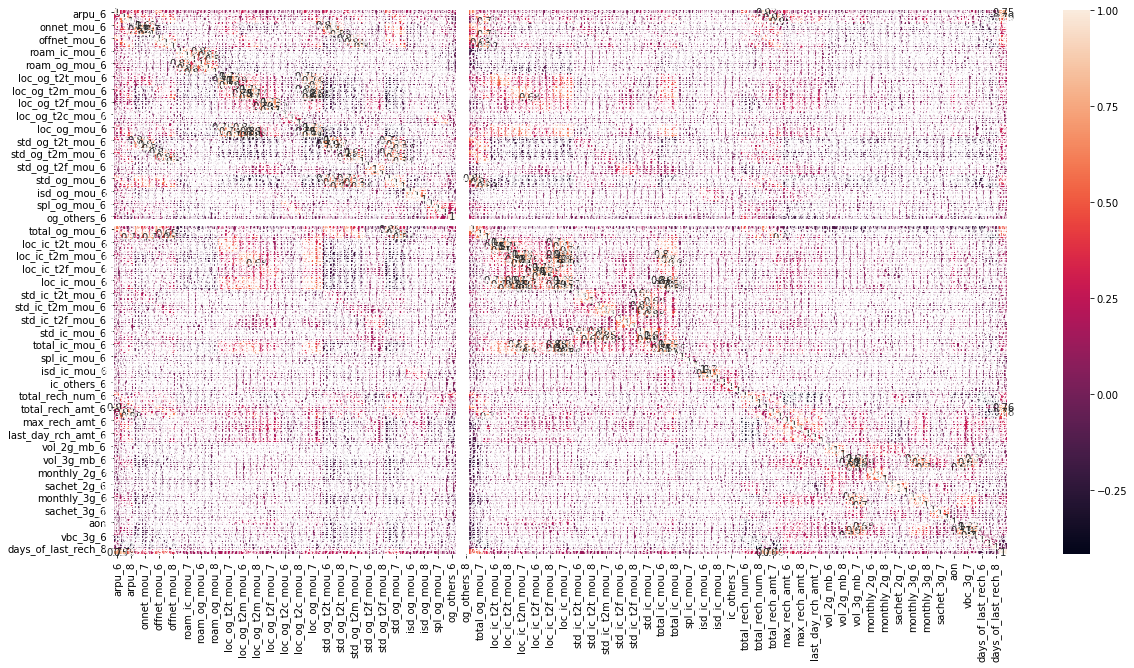

In [35]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

### Dropping highly correlated variables.

In [36]:
# Checking correlations

# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Display highly correlated columns to drop
print(to_drop)

['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'monthly_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'avg_rech_amt_good_phase']


In [37]:
X_test = X_test.drop(to_drop, 1)
X_train = X_train.drop(to_drop ,1)

### Checking the Correlation Matrix again

After dropping highly correlated variables now let's check the correlation matrix again.

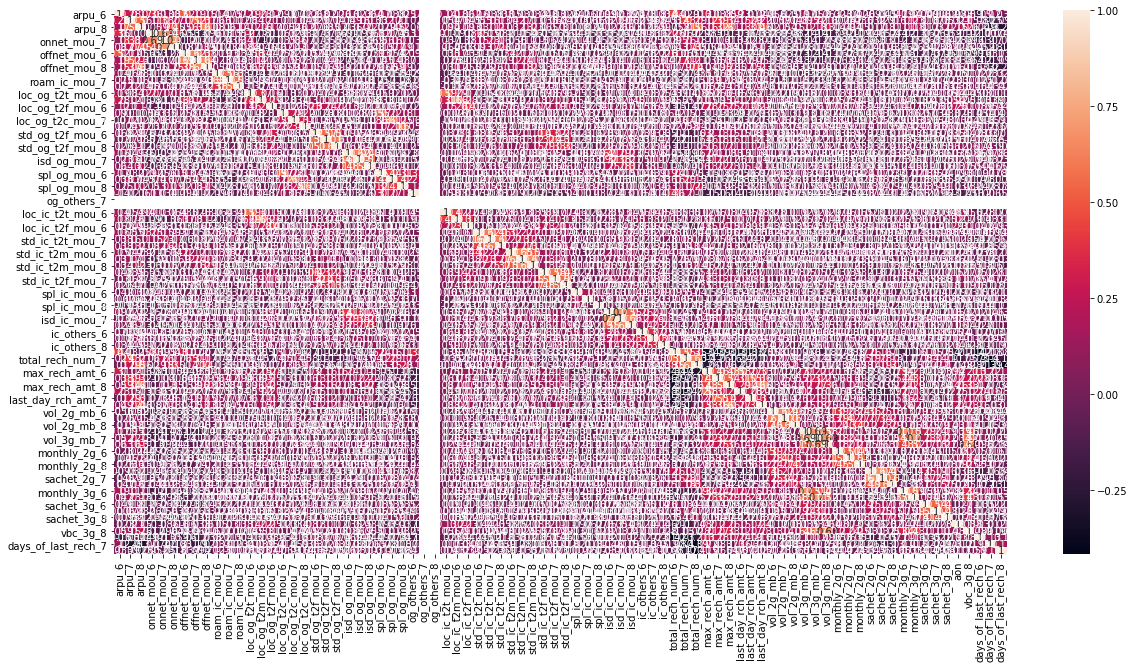

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)

### PCA on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [39]:
X_train.shape

(38385, 82)

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(random_state=42)

In [42]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [43]:
pca.components_

array([[ 6.47174342e-02,  1.33885737e-01,  1.87094491e-01, ...,
         1.14297650e-01,  2.33394972e-02,  1.36030904e-02],
       [ 1.20364358e-01,  2.41306503e-01,  2.54897995e-01, ...,
        -1.51305561e-01, -1.89685103e-01, -1.44521471e-01],
       [-7.96862597e-02, -4.44557589e-02, -2.69378503e-02, ...,
         4.40403009e-03, -2.86272971e-02, -1.44249880e-02],
       ...,
       [-6.00592752e-02,  4.50722393e-01, -5.59573179e-01, ...,
         4.46787502e-03, -2.72529873e-02,  1.00099868e-02],
       [ 2.48529342e-20,  1.02309884e-16,  1.73674120e-16, ...,
         6.96311918e-17, -9.93763700e-17,  2.26196776e-18],
       [-0.00000000e+00, -1.79656068e-16,  1.06179726e-16, ...,
         2.00496861e-18,  1.27720336e-16,  1.12500840e-16]])

Looking at the explained variance ratio for each component

In [44]:
pca.explained_variance_ratio_

array([8.67930475e-02, 6.29601782e-02, 5.60328215e-02, 4.34973641e-02,
       3.86237743e-02, 3.63773644e-02, 3.48858100e-02, 3.20518857e-02,
       3.00351961e-02, 2.88484216e-02, 2.66650123e-02, 2.25184521e-02,
       2.12643993e-02, 1.85729320e-02, 1.77035840e-02, 1.75224651e-02,
       1.59575371e-02, 1.54843842e-02, 1.42998302e-02, 1.34336115e-02,
       1.29809506e-02, 1.29277980e-02, 1.24611636e-02, 1.21601364e-02,
       1.16155934e-02, 1.12527758e-02, 1.09200786e-02, 1.05773376e-02,
       1.05000029e-02, 9.62830288e-03, 9.45393580e-03, 9.29138572e-03,
       9.11306267e-03, 8.62405532e-03, 8.52525959e-03, 8.24756686e-03,
       7.79333260e-03, 7.64074856e-03, 7.54730368e-03, 7.43972862e-03,
       7.27648412e-03, 6.86618973e-03, 6.74067040e-03, 6.59875795e-03,
       6.46664849e-03, 6.42159689e-03, 6.20961132e-03, 6.12396070e-03,
       6.02574652e-03, 5.85696978e-03, 5.71976940e-03, 5.57128870e-03,
       5.31703577e-03, 5.06403394e-03, 4.94717706e-03, 4.73429017e-03,
      

#### Making a scree plot for the explained variance

In [45]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

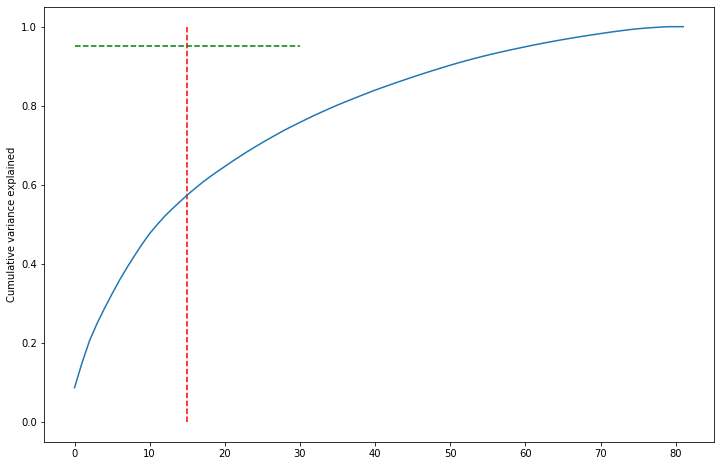

In [46]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

## Perform PCA with 16 components

In [47]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=16)
df_train_pca = pca_final.fit_transform(X_train)

In [48]:
df_train_pca.shape

(38385, 16)

In [49]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(16, 16)

#### Plotting the heatmap of the corr matrix

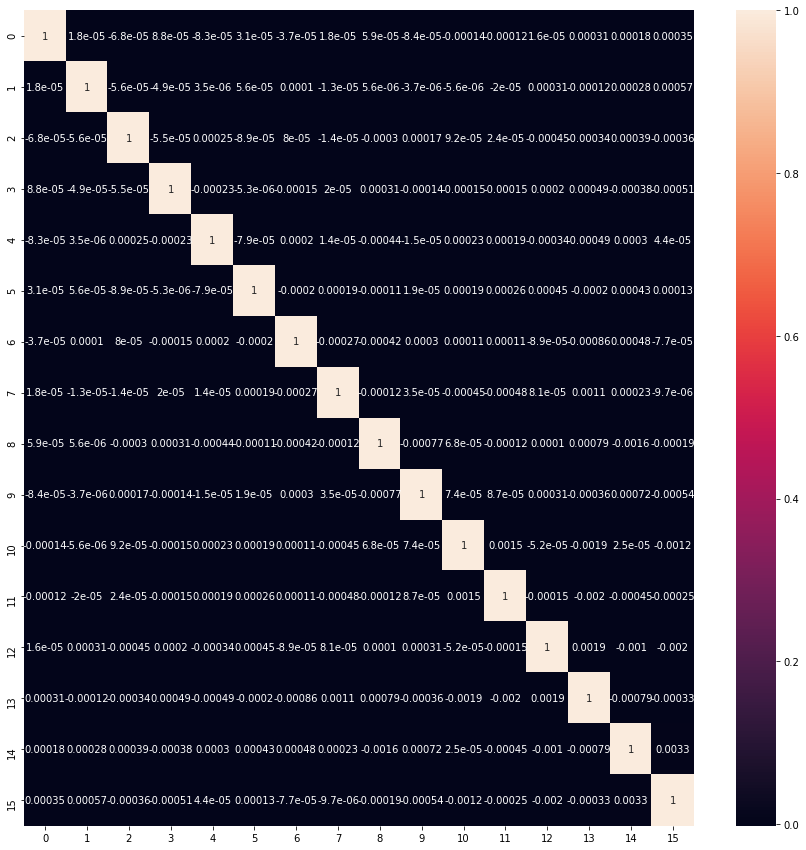

In [50]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### Applying the transformation on the test set

In [51]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(16451, 16)

## Applying Logistic Regression on the data on our Principal components

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression()

In [54]:
logreg_pca = logreg.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [55]:
pred_probs_test = logreg_pca.predict_proba(df_test_pca)

#### Let's check the metrics with cutoff 0.5 which is standard

In [56]:
from sklearn.metrics import confusion_matrix

cutoff = 0.5
y_predict = [int(proba[1] > cutoff) for proba in pred_probs_test]

#Confusion Matrix
M = confusion_matrix(y_test, y_predict)
n_samples = len(y_test)

# M[1,1] # true positive 
# M[0,0] # true negatives
# M[0,1] # false positives
# M[1,0] # false negatives

print(M)
print('Accuracy: %.2f' % ((M[0][0] + M[1][1]) / n_samples))
print('Precision: %.2f' % (M[1][1] / (M[0][1] + M[1][1])))
print('Recall/Sensitivity: %.2f' % (M[1][1] / (M[1][0] + M[1][1])))
print('Specificity: %.2f' % (M[0][0] / (M[0][0] + M[0][1])))

[[7563  646]
 [3574 4668]]
Accuracy: 0.74
Precision: 0.88
Recall/Sensitivity: 0.57
Specificity: 0.92


In [74]:
# Draw ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

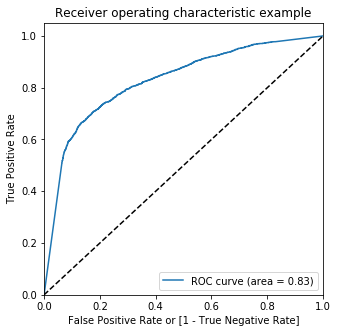

In [80]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test[:,1], drop_intermediate = False )
draw_roc(y_test, pred_probs_test[:,1])

In [57]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.83'

#### ROC Accuracy Score got from Logistic Regression is 83% which is great.

## Applying Decision Tree on the data on our Principal components

In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
dt_pca = decision_tree.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [59]:
Ypred1 = dt_pca.predict(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, Ypred1[:]))

'0.6'

#### ROC Accuracy Score got from Decision Tree is 60% which is not great.

## Applying random forest on the data on our Principal components

In [60]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF(n_estimators = 25)
# Train the classifier
clf_pca = clf.fit(df_train_pca, y_train)

#### Making predictions on the test set

In [61]:
output_predictions = clf_pca.predict(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, output_predictions[:]))

'0.5'

#### ROC Accuracy Score got from Random Forest is 50% which is not great.

## From the scores of different algorithms, Logistic Regression model performance is the best.

## Building another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn.

## Let's build Lasso model as it is useul in feature selection 

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import os

In [63]:
# list of alphas to tune
params = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   17.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.617658,0.074549,0.006326,0.005293,1e-06,{'alpha': 1e-06},-0.309014,-0.307090,-0.309706,-0.308742,-0.311333,-0.309177,0.001378,1,-0.308455,-0.309005,-0.308361,-0.308612,-0.307888,-0.308464,0.000363
1,0.551341,0.020101,0.005540,0.005852,1e-05,{'alpha': 1e-05},-0.309020,-0.307101,-0.309711,-0.308749,-0.311340,-0.309184,0.001377,2,-0.308463,-0.309013,-0.308368,-0.308619,-0.307895,-0.308472,0.000363
2,0.410355,0.014267,0.003925,0.006052,0.0001,{'alpha': 0.0001},-0.309080,-0.307209,-0.309765,-0.308819,-0.311417,-0.309258,0.001367,3,-0.308542,-0.309090,-0.308444,-0.308697,-0.307973,-0.308549,0.000363
3,0.316664,0.031804,0.009375,0.007655,0.001,{'alpha': 0.001},-0.309814,-0.308260,-0.310511,-0.309652,-0.312289,-0.310105,0.001314,4,-0.309455,-0.309962,-0.309370,-0.309643,-0.308831,-0.309452,0.000371
4,0.185144,0.015590,0.000000,0.000000,0.01,{'alpha': 0.01},-0.319927,-0.318993,-0.321324,-0.320164,-0.324141,-0.320910,0.001778,5,-0.320646,-0.320972,-0.320457,-0.320889,-0.319671,-0.320527,0.000465


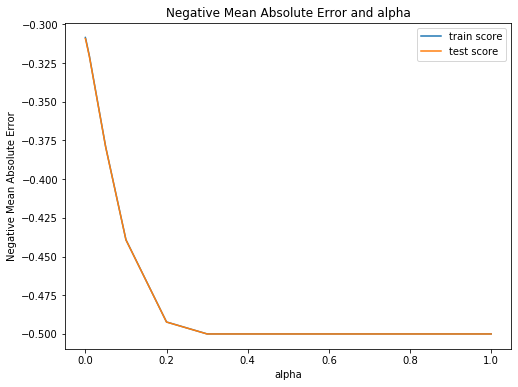

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(8,6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [66]:
# Find best parameter and score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1e-06}
-0.3091769533974082


In [67]:
print ("{:f}".format(float("1e-06")))

0.000001


###  Identified optimal value of alpha is 0.000001 for Lasso

In [68]:
# Get Lasso coefficients for alpha 0.000001
alpha = 0.000001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
lasso.coef_

array([ 0.03147754,  0.06174311, -0.04810484,  0.02762469, -0.01446894,
       -0.01591061,  0.02965324,  0.00512429, -0.0267458 , -0.00924142,
        0.01549859,  0.07460528, -0.01792673, -0.04010685, -0.01199646,
       -0.00304012,  0.00277105,  0.00776467,  0.00114069,  0.00399199,
       -0.00832022,  0.0018983 ,  0.00647279,  0.01384169, -0.00374506,
        0.00304909, -0.00603764, -0.00281034,  0.        ,  0.        ,
       -0.00476829, -0.0020263 , -0.01066452,  0.00410542,  0.01772896,
       -0.02214009,  0.01036586, -0.01027988, -0.01901371, -0.00014967,
        0.00026718, -0.00902406, -0.00180624, -0.00133928, -0.02707291,
        0.01069794,  0.00519072, -0.00810501, -0.00279691, -0.00249448,
       -0.00374986,  0.01302075,  0.02035336, -0.09042331,  0.00815866,
        0.00530612, -0.03233874, -0.00497003, -0.02330899, -0.09730433,
        0.00513641,  0.00193638, -0.02374175,  0.0045724 ,  0.01322307,
       -0.02964549, -0.01053593, -0.00613453, -0.02463175,  0.00

In [70]:
# Lasso regression coefficients with columns as index
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.head()

arpu_6         0.031478
arpu_7         0.061743
arpu_8        -0.048105
onnet_mou_6    0.027625
onnet_mou_7   -0.014469
dtype: float64

In [71]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 80 variables and eliminated the other 2 variables


## The company wants to know:

- Which variables are significant in predicting the churners, and

- How well those variables contributed in predicting churners.

### Lasso Regression is useful for feature selecton. 
### So, let's find the significant variables contributed in predicting the churners.

Text(0.5, 1.0, 'Important predictor attributes which help the business understand indicators of churn')

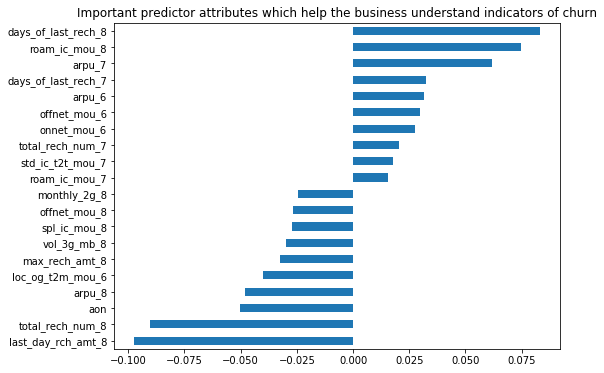

In [72]:
# Show top 10 and bottom 10 features selected by Lasso
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.figure(figsize=(8,6))
imp_coef.plot(kind = "barh")
plt.title("Important predictor attributes which help the business understand indicators of churn")

## Recommended strategies to manage customer churn based on observations

- From above graph, longer the bar, more important predictor in churning.
- If we observe the above graph, more features are from 8th month. It indicates that those who are not recharged in 8th month (action phase) for many days either for voice or data or roaming are deffinitely planning to churn.
- So, provide them offers such as unlimited calling only for one/two other numbers and discounts such as 1 month free if recharged for 3 months and provide better offers/discounts than the competitors from market to retain them.
    

In [73]:
#                                                -End-